In [12]:
### Imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [38]:
### Auxiliary Functions

def f(a, x): # Probability Distribution
    N = 0.5 / (1 + a / 3)
    value = N * (1 + a * x ** 2 )
    return value

def histogram(values, num_bins, bin_edges): # Histogram maker
    counts = np.zeros(num_bins)
    step_size = (bin_edges[1] - bin_edges[0]) / num_bins
    bins = np.arange(bin_edges[0], bin_edges[1] + step_size, step_size)
    for i in range(np.size(values)):
        for j in range(np.size(bins) - 1):
            if(values[i] > bins[j] and values[i] < bins[j + 1]):
                counts[j] += 1
    return(counts, bins, step_size)

def ArgMax(x): # Argument Maximum finder
    pos = 0
    maximum = x[pos]
    for i in range(np.size(x)):
        if(x[i] > maximum):
            maximum = x[i]
            pos = i
    return(pos)

def logL(alpha, cosines): # Defining the Log-likelihood function
    m = np.size(cosines)
    value = - m * np.log(2) - m * np.log(1 + alpha/3) + np.sum( np.log( 1 + alpha * np.square( cosines ) ) )
    return value

In [39]:
### Preliminiaries

np.random.seed(10000)
alpha = np.linspace(0, 25, 1000)

In [40]:
### Getting the MC values for N = 500

N1 = 500
alpha1 = 5.5

x1 = 2. * np.random.random(N1) - 1. # Generate N numbers between -1 and 1
pr1 = 0.5 / (1 + alpha1 / 3) * (1 + alpha1) * np.random.random(N1)
probabilities1 = f(alpha1, x1)
accepted_x1 = []
accepted_p1 = []

for i in range(np.size(probabilities1)): # Rejection Method
    if(pr1[i] <= probabilities1[i]):
        accepted_p1.append(pr1[i])
        accepted_x1.append(x1[i])

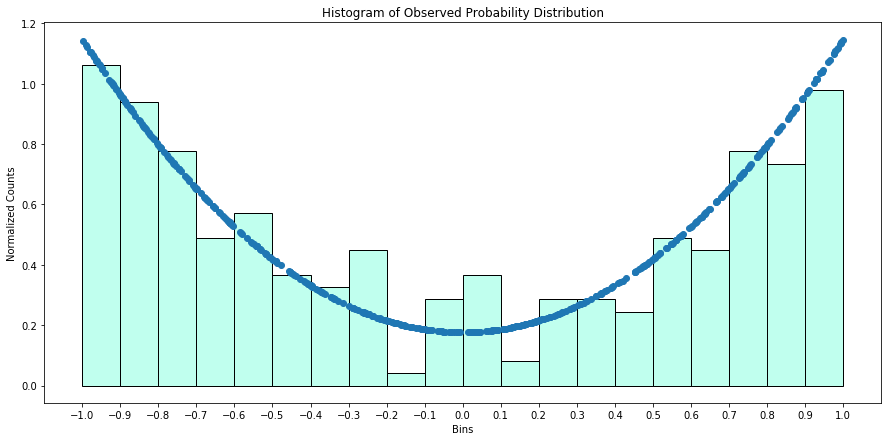

In [41]:
### Plotting the histogram

cts1, bins1, bin_size1 = histogram(accepted_x1, 20, np.array([-1., 1.]))
fig, ax = plt.subplots(1)
fig.set_size_inches(15, 7)
plt.xticks(np.arange(-1, 1 + bin_size1, bin_size1))
plt.xlabel('Bins')
plt.ylabel('Normalized Counts')
plt.title('Histogram of Observed Probability Distribution')
for i in range(np.size(bins1) - 1):
    rect1 = patches.Rectangle((bins1[i], 0), bin_size1, cts1[i] / (np.sum(cts1) * bin_size1), fc = '#c0ffee', ec = 'k')
    ax.add_patch(rect1)
plt.plot(x1, f(alpha1, x1), 'o')

In [42]:
### Statistics of the MC Simulation

print("The mean of the simulated data is: " + str(np.mean(accepted_x1)))
print("The variance of the simulated data is: " + str(np.square(np.std(accepted_x1))))

The mean of the simulated data is: -0.040823060666519195
The variance of the simulated data is: 0.49037611912741885


In [43]:
### Getting the Likelihood Values

likelihood_1 = np.array([logL(alpha[i], accepted_x1) for i in range(np.size(alpha))])

---

In [44]:
### Getting the MC values for N = 4000

N2 = 4000
alpha2 = 5.5

x2 = 2. * np.random.random(N2) - 1. # Generate N numbers between -1 and 1
pr2 = ( 0.5 / (1 + alpha2 / 3) ) * (1 + alpha2) * np.random.random(N2)
probabilities2 = f(alpha2, x2)
accepted_x2 = []
accepted_p2 = []

for i in range(np.size(probabilities2)): # Rejection Method
    if(pr2[i] <= probabilities2[i]):
        accepted_p2.append(pr2[i])
        accepted_x2.append(x2[i])

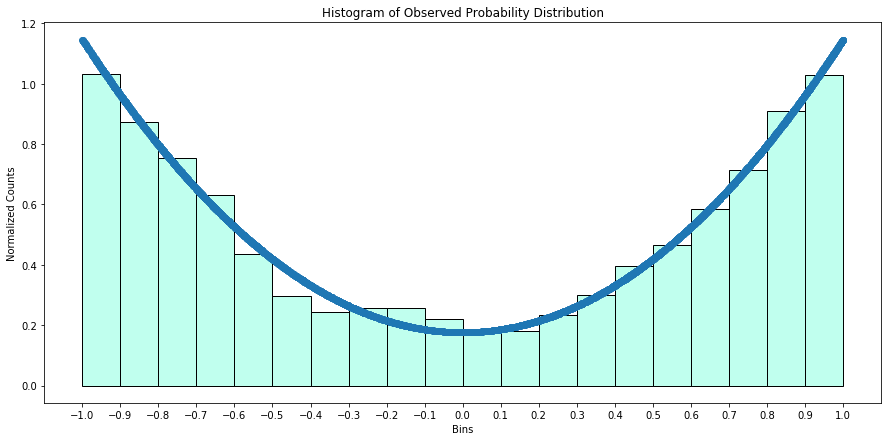

In [45]:
### Plotting the histogram

cts2, bins2, bin_size2 = histogram(accepted_x2, 20, np.array([-1., 1.]))
fig, ax = plt.subplots(1)
fig.set_size_inches(15, 7)
plt.xticks(np.arange(-1, 1 + bin_size2, bin_size2))
plt.xlabel('Bins')
plt.ylabel('Normalized Counts')
plt.title('Histogram of Observed Probability Distribution')
for i in range(np.size(bins2) - 1):
    rect2 = patches.Rectangle((bins2[i], 0.), width = bin_size2, height = cts2[i] / (np.sum(cts2) * bin_size2), fc = '#c0ffee', ec = 'k')
    ax.add_patch(rect2)
plt.plot(x2, f(alpha2, x2), 'o')

In [46]:
### Statistics of the MC Simulation

print("The mean of the simulated data is: " + str(np.mean(accepted_x2)))
print("The variance of the simulated data is: " + str(np.square(np.std(accepted_x2))))

The mean of the simulated data is: 0.0038862638541501517
The variance of the simulated data is: 0.5053737698410843


In [47]:
### Getting the Likelihood Values

likelihood_2 = np.array([logL(alpha[i], accepted_x2) for i in range(np.size(alpha))])

---

In [48]:
### Getting the cosine values

accepted_x3 = np.genfromtxt("list.txt", delimiter=',')
likelihood_3 = np.array([[logL(alpha[i], accepted_x3)] for i in range(np.size(alpha))])

---

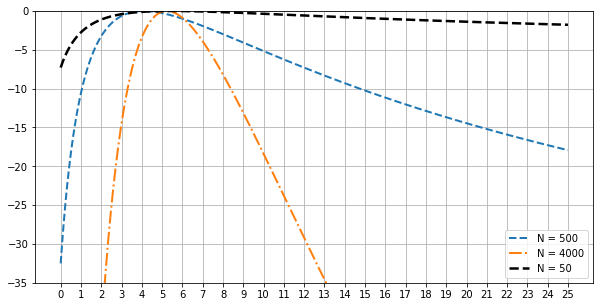

In [49]:
### Maximum Likelihood Estimation

fig, ax = plt.subplots(1)
fig.set_size_inches(10, 5)
plt.xticks(np.arange(0, 26, 1))
plt.plot(alpha, likelihood_1 - np.max(likelihood_1), '--', lw = 2, label = 'N = 500')
plt.plot(alpha, likelihood_2 - np.max(likelihood_2), '-.', lw = 2, label = 'N = 4000')
plt.plot(alpha, likelihood_3 - np.max(likelihood_3), 'k--', lw = 2.5, label= 'N = 50')
plt.ylim([-35., 0.])
plt.grid()
plt.legend()

In [50]:
max_alpha1 = alpha[ArgMax(likelihood_1)]
max_alpha2 = alpha[ArgMax(likelihood_2)]
print('The MLE of the parameter alpha for N = 500 is: ' + str(max_alpha1))
print('The MLE of the parameter alpha for N = 4000 is: ' + str(max_alpha2))

The MLE of the parameter alpha for N = 500 is: 4.104104104104104
The MLE of the parameter alpha for N = 4000 is: 5.23023023023023


In [ ]:
relative_values1 = likelihood_1 - np.max(likelihood_1)
relative_values2 = likelihood_2 - np.max(likelihood_2)
pos1 = ArgMax(relative_values1)
pos2 = ArgMax(relative_values2)

temp = []
for j in range(np.size(relative_values1)):
    if(np.abs(relative_values1[pos1] - relative_values1[j]) < 0.5):
        temp.append(j)
uncertainty1 = np.array([alpha[temp[0]], alpha[temp[-1]]])

temp = []
for j in range(np.size(relative_values2)):
    if(np.abs(relative_values2[pos2] - relative_values2[j]) < 0.5):
        temp.append(j)
uncertainty2 = np.array([alpha[temp[0]], alpha[temp[-1]]])

In [ ]:
print("Error bound on alpha from N = 500 is : [" + str(uncertainty1[0]) + ', ' + str(uncertainty1[1]) + ']')
print("Error bound on alpha from N = 4000 is : [" + str(uncertainty2[0]) + ', ' + str(uncertainty2[1]) + ']')